<a href="https://colab.research.google.com/github/95871abhinandankumar/95871abhinandankumar/blob/main/ML_assignment5_batch_gradient_descent_skitlearn_updated_version.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [23]:
from sklearn import datasets
import pandas as pd


boston = datasets.load_boston(return_X_y=False)
boston_df = pd.DataFrame(boston.data, columns=boston.feature_names)
boston_df['PRICE'] = boston.target
print(boston_df)

        CRIM    ZN  INDUS  CHAS    NOX  ...    TAX  PTRATIO       B  LSTAT  PRICE
0    0.00632  18.0   2.31   0.0  0.538  ...  296.0     15.3  396.90   4.98   24.0
1    0.02731   0.0   7.07   0.0  0.469  ...  242.0     17.8  396.90   9.14   21.6
2    0.02729   0.0   7.07   0.0  0.469  ...  242.0     17.8  392.83   4.03   34.7
3    0.03237   0.0   2.18   0.0  0.458  ...  222.0     18.7  394.63   2.94   33.4
4    0.06905   0.0   2.18   0.0  0.458  ...  222.0     18.7  396.90   5.33   36.2
..       ...   ...    ...   ...    ...  ...    ...      ...     ...    ...    ...
501  0.06263   0.0  11.93   0.0  0.573  ...  273.0     21.0  391.99   9.67   22.4
502  0.04527   0.0  11.93   0.0  0.573  ...  273.0     21.0  396.90   9.08   20.6
503  0.06076   0.0  11.93   0.0  0.573  ...  273.0     21.0  396.90   5.64   23.9
504  0.10959   0.0  11.93   0.0  0.573  ...  273.0     21.0  393.45   6.48   22.0
505  0.04741   0.0  11.93   0.0  0.573  ...  273.0     21.0  396.90   7.88   11.9

[506 rows x 14 

In [24]:
train_dataset = boston_df.sample(frac=0.3)
dataframe = boston_df.drop(train_dataset.index)
validation_dataset = dataframe.sample(frac=(.1/.7))
test_dataset = dataframe.drop(validation_dataset.index)

print("train dataset\n", train_dataset)
# print("validation dataset\n", validation_dataset)
# print("test dataset\n", test_dataset)

train dataset
          CRIM    ZN  INDUS  CHAS    NOX  ...    TAX  PTRATIO       B  LSTAT  PRICE
259   0.65665  20.0   3.97   0.0  0.647  ...  264.0     13.0  391.93   6.90   30.1
238   0.08244  30.0   4.93   0.0  0.428  ...  300.0     16.6  379.41   6.36   23.7
499   0.17783   0.0   9.69   0.0  0.585  ...  391.0     19.2  395.77  15.10   17.5
191   0.06911  45.0   3.44   0.0  0.437  ...  398.0     15.2  389.71   4.69   30.5
466   3.77498   0.0  18.10   0.0  0.655  ...  666.0     20.2   22.01  17.15   19.0
..        ...   ...    ...   ...    ...  ...    ...      ...     ...    ...    ...
488   0.15086   0.0  27.74   0.0  0.609  ...  711.0     20.1  395.09  18.06   15.2
107   0.13117   0.0   8.56   0.0  0.520  ...  384.0     20.9  387.69  14.09   20.4
101   0.11432   0.0   8.56   0.0  0.520  ...  384.0     20.9  395.58   7.67   26.5
142   3.32105   0.0  19.58   1.0  0.871  ...  403.0     14.7  396.90  26.82   13.4
398  38.35180   0.0  18.10   0.0  0.693  ...  666.0     20.2  396.90  30

In [25]:
from sklearn import preprocessing
import numpy as np


In [26]:
def hypothesis(w, index, dataset):
  sample =dataset[index][:-1]
  sample = np.concatenate([[1], sample])
  array = np.multiply(w, sample)
  return np.sum(array)

In [27]:
# to calculate the predicted value with the help of hypothesis function
def predicted_values(w, dataset):
  predicted = []
  for i in range(len(dataset)):
    predicted.append(hypothesis(w, i, dataset))
  
  return np.array(predicted)


# to calculate mean square error
def MSE(predicted, actual):
  return np.square(np.subtract(predicted, actual)).mean()/2

In [28]:
# to update w using batch gradient decendent
def update_parameter(w, alpha, dataset):
  predicted = predicted_values(w, dataset)
  m = len(dataset)
  w[0] = w[0] - (alpha /m)*(np.sum(np.subtract(predicted, dataset[:, -1])))
  for i in range(1, len(w)):
    w[i] = w[i] - (alpha /m)*(np.sum(np.multiply(np.subtract(predicted, dataset[:, -1]), dataset[:, i-1])))
  return w

In [29]:
def linear_regression(epoch, alpha, rho, w, train_dataset, validation):
  pre_MSE = 0
  curr_MSE = 0
  trains_MSE=[]
  validations_MSE=[]
  for itr in range(epoch):
    predicted = predicted_values(w, train_dataset)
    curr_MSE = MSE(predicted, train_dataset[:,-1])
    w = update_parameter(w, alpha, train_dataset)
    
    trains_MSE.append(curr_MSE)
    predicted = predicted_values(w, validation)
    validations_MSE.append(MSE(predicted, validation[:,-1]))

    if abs(curr_MSE - pre_MSE) <= rho:
      break;
    pre_MSE = curr_MSE
  return w, trains_MSE, validations_MSE

In [30]:

train = preprocessing.normalize(train_dataset.to_numpy())
validation = preprocessing.normalize(validation_dataset.to_numpy())
test = preprocessing.normalize(test_dataset.to_numpy())

print("train dataset after normalization...")
print(train, "\n\n\n\n")
print("validation dataset after normalization...")
print(validation, "\n\n\n\n")
print("test dataset after normalization...")
print(test)

train dataset after normalization...
[[1.35479554e-03 4.12638555e-02 8.19087532e-03 ... 8.08627145e-01
  1.42360302e-02 6.21021025e-02]
 [1.69623629e-04 6.17262115e-02 1.01436741e-02 ... 7.80651397e-01
  1.30859568e-02 4.87637071e-02]
 [3.16351838e-04 0.00000000e+00 1.72380887e-02 ... 7.04057621e-01
  2.68622434e-02 3.11317391e-02]
 ...
 [2.05201098e-04 0.00000000e+00 1.53649528e-02 ... 7.10054675e-01
  1.37674285e-02 4.75667346e-02]
 [5.76806213e-03 0.00000000e+00 3.40069124e-02 ... 6.89343389e-01
  4.65814807e-02 2.32733721e-02]
 [4.89099447e-02 0.00000000e+00 2.30828800e-02 ... 5.06165474e-01
  3.90113425e-02 6.37648620e-03]] 




validation dataset after normalization...
[[4.62178838e-04 4.39375262e-02 7.31559811e-03 0.00000000e+00
  9.72996518e-04 1.49651214e-02 7.07394172e-02 9.00873068e-03
  1.09843815e-02 4.74525283e-01 3.27334570e-02 8.71940207e-01
  1.06548501e-02 7.71103585e-02]
 [2.80870012e-04 0.00000000e+00 2.18033531e-02 0.00000000e+00
  1.00678373e-03 1.21287586e-02 4.5

In [31]:
w=[1 for _ in range(14)]
w, trains_MSE, validations_MSE= linear_regression(500, 0.1, 0.001, w, train, validation)


print(trains_MSE)
print(validations_MSE)
predicted = predicted_values(w, test)
test_MSE = MSE(predicted, test[:,-1])
print(test_MSE)



[3.304005930440043, 2.147185599456119, 1.39558338484992, 0.9072567965802596, 0.5899839033557853, 0.3838468848600062, 0.24991633305746974, 0.162899291645675, 0.10636258911093027, 0.06962937442845192, 0.04576275486391081, 0.030255738527149363, 0.020180072555182574, 0.013633231913509338, 0.009379120635561084, 0.006614630619990496, 0.004817971763955818, 0.0036501300253534517, 0.002890843409943871]
[2.1526114042724394, 1.4018215845235524, 0.9134532282549199, 0.5956947829720676, 0.38887336709172815, 0.25420125451332976, 0.16646348965273083, 0.10926626869270831, 0.07194921452291177, 0.047578810004518836, 0.031644358243233535, 0.021210451655091497, 0.014366095311224382, 0.009866614330142591, 0.006900850894273607, 0.004939791983680446, 0.003638126572739256, 0.0027702101880909802, 0.00218839918439818]
0.0023388081654058504


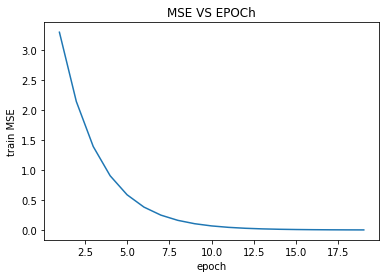

In [32]:
import matplotlib.pyplot as plt

# print(trains_MSE1)
epoch = [i+1 for i in range(len(trains_MSE))]
plt.plot(epoch, trains_MSE)
plt.title("MSE VS EPOCh")
plt.xlabel("epoch")
plt.ylabel("train MSE")

plt.show()

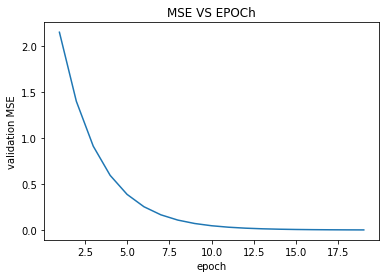

In [33]:
plt.plot(epoch, validations_MSE)
plt.title("MSE VS EPOCh")
plt.xlabel("epoch")
plt.ylabel("validation MSE")

plt.show()

In [34]:
from sklearn.linear_model import LinearRegression
reg = LinearRegression()
reg.fit(np.delete(train, -1, 1),  train[:,-1])


from sklearn.metrics import mean_squared_error
mse_train = mean_squared_error(train[:,-1], reg.predict(np.delete(train, -1, 1)), sample_weight=None)
mse_validation = mean_squared_error(validation[:,-1], reg.predict(np.delete(validation, -1, 1)), sample_weight=None)
mse_test = mean_squared_error(test[:,-1], reg.predict(np.delete(test, -1, 1)), sample_weight=None)
print("train_mse", mse_train)
print("validation mse", mse_validation)
print("test_mse", mse_test)

train_mse 4.5370125147237226e-05
validation mse 8.934134958068461e-05
test_mse 7.424870138178461e-05


In [41]:
train_UN = train_dataset.to_numpy()
validation_UN = validation_dataset.to_numpy()
test_UN = test_dataset.to_numpy()

w=[1 for _ in range(14)]
w, trains_MSE, validations_MSE= linear_regression(2000, 0.000001, 0.001, w, train_UN, validation_UN)


print(trains_MSE)
print(validations_MSE)
predicted = predicted_values(w, test)
test_MSE = MSE(predicted, test[:,-1])
print(test_MSE)
print(trains_MSE)
print(validations_MSE)
predicted = predicted_values(w, test_UN)
test_MSE = MSE(predicted, test_UN[:,-1])
print(test_MSE)

[393336.2137948031, 193723.24943036537, 95519.4653005562, 47205.9775972621, 23437.02996674921, 11743.265200757887, 5990.130949295278, 3159.610171593346, 1766.92837358627, 1081.620726851832, 744.3202915118284, 578.2292357950631, 496.36829135865503, 455.9462478641305, 435.9111034046162, 425.90589914915694, 420.8353189353326, 418.1926181008011, 416.7445520844932, 415.88440046671894, 415.3136740661428, 414.8855243109994, 414.52770531299143, 414.204673501473, 413.8989417716127, 413.60190627997173, 413.30933350049264, 413.01913998983, 412.7303000974135, 412.44230859074486, 412.1549162824864, 411.86799996631777, 411.58149842872837, 411.2953809682212, 411.00963190721325, 410.724242971885, 410.43920954284374, 410.1545288101282, 409.87019886510865, 409.5862182533287, 409.3025857541289, 409.0193002718578, 408.73636078199087, 408.4537663042795, 408.1715158892088, 407.8896086110148, 407.60804356394243, 407.3268198601083, 407.0459366281626, 406.76539301235874, 406.4851881718283, 406.2053212799726, 4

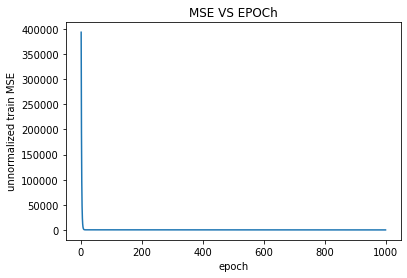

In [36]:
epoch = [i+1 for i in range(len(trains_MSE))]
plt.plot(epoch, trains_MSE)
plt.title("MSE VS EPOCh")
plt.xlabel("epoch")
plt.ylabel("unnormalized train MSE")
plt.show()

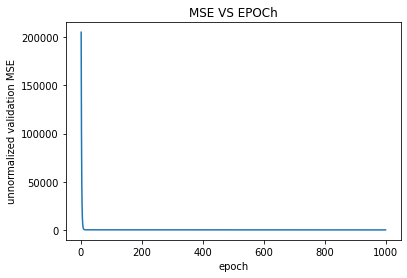

In [39]:
plt.plot(epoch, validations_MSE)
plt.title("MSE VS EPOCh")
plt.xlabel("epoch")
plt.ylabel("unnormalized validation MSE")
plt.show()

In [40]:
# when dataset is not normalized

from sklearn.linear_model import LinearRegression
reg = LinearRegression()
reg.fit(np.delete(train_UN, -1, 1),  train_UN[:,-1])


from sklearn.metrics import mean_squared_error
mse_train = mean_squared_error(train_UN[:,-1], reg.predict(np.delete(train_UN, -1, 1)), sample_weight=None)
mse_validation = mean_squared_error(validation_UN[:,-1], reg.predict(np.delete(validation_UN, -1, 1)), sample_weight=None)
mse_test = mean_squared_error(test_UN[:,-1], reg.predict(np.delete(test_UN, -1, 1)), sample_weight=None)
print("train_mse", mse_train)
print("validation mse", mse_validation)
print("test_mse", mse_test)

train_mse 13.644289736668899
validation mse 39.549174064282475
test_mse 30.093009500835414
